In [251]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
%matplotlib inline

In [252]:
class Perceptron(object):
    def __init__(self, eta=0.01, iter=100):
        self.eta = eta
        self.iter = iter
        self.w_ = np.zeros(np.shape(X)[1] + 1)
        self.errors = []
    
    def input_function(self, X):
        return np.dot(X, self.w_[1:].T) + self.w_[0]
    
    def predict(self, X):
        print self.w_
        return np.where(self.input_function(X) >= 0, 1, -1)
     
    def fit(self, X, Y):
        for _ in range(self.iter):
            output = eta * (Y - predict_function(self.w_, X))
            # updating the weights according to the output above
            self.w_[0] += np.dot(output.T, np.ones(np.shape(X)[0]))  
            self.w_[1:] += np.dot(output.T, X)
            self.errors.append(sum(np.where(output != 0.0, 1, 0)))
        return self

In [253]:
per = Perceptron(eta=0.1, iter=100)

In [254]:
data_pd = pd.read_csv("ml-new-beginning/datasets/Iris.csv")

In [255]:
data_pd.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [256]:
# Input dataset containing Sepal Length and Petal Length as the input variable
X = data_pd.loc[:100, ["SepalLengthCm", "PetalLengthCm"]].values

In [257]:
# output for Species with setosa as 1 and all others as -1
Y = data_pd.loc[:100, "Species"].values
Y = np.where(Y == "Iris-setosa", 1, -1)

In [258]:
model = per.fit(X, Y)

In [259]:
per.predict(np.array([3.32, 5.67]))

[ 1.32   3.148 -8.42 ]


array(-1)

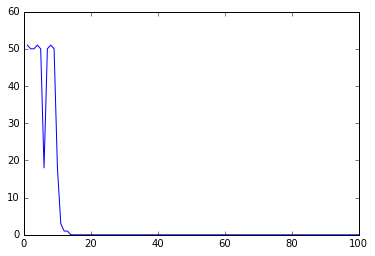

In [260]:
pyplot.plot(range(1, len(model.errors) + 1, 1), model.errors)
pyplot.show()

In [261]:
from matplotlib.colors import ListedColormap

In [262]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    # print np.array([xx1.ravel(), xx2.ravel()]).T
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # print Z
    # print type(Z)
    Z = Z.reshape(xx1.shape)
    pyplot.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    pyplot.xlim(xx1.min(), xx1.max())
    pyplot.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        pyplot.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)

[ 1.32   3.148 -8.42 ]


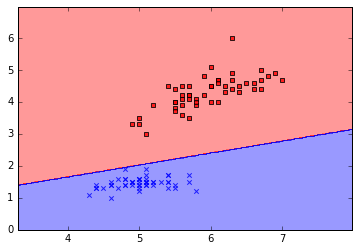

In [263]:
plot_decision_regions(X, Y, per)